In [114]:
execfile ("D:/measuring/analysis/scripts/setup_analysis.py")

import os, sys 
from os import listdir 
from os.path import isfile, join 
import numpy as np 
import matplotlib.pyplot as plt 
import h5py
from analysis.lib.tools import toolbox

from analysis.lib.fitting import fit, common

%matplotlib inline 

# folder = r'D:\measuring\analysis_data\telecom\HOM\SIL3\LT3_early_data\20161208'
# folder = r'D:\measuring\analysis_data\telecom\HOM\SIL2'
# folder = r'D:\measuring\analysis_data\telecom\HOM\SIL3\LT3 without magnet'
# folder = r'D:\measuring\analysis_data\telecom\HOM\SIL3\LT3 disting'
# folder = r'D:\measuring\analysis_data\telecom\HOM\SIL3\LT3_noMag_InvalidData_LowRepump_OtherPulsePath_Ey_highstrain'
# folder = r'D:\measuring\analysis_data\telecom\HOM\SIL3\LT3_noMag_InvalidData_v2'
# folder = r'D:\measuring\analysis_data\telecom\HOM\SIL3\LT3_SIL3_Ex_noMag'
# folder = r'D:\measuring\analysis_data\telecom\HOM\SIL3\LT3_lessPulses_moreReps_lowStrain_v2'
# folder = r'D:\measuring\analysis_data\telecom\HOM\SIL3\20170210_Ex_highstrain_15_50reps'
# folder = r'D:\measuring\analysis_data\telecom\HOM\SIL3\20170211_Ey_lowstrain_15_50reps'
# folder = r'D:\measuring\analysis_data\telecom\HOM\SIL3\20170214_Ex_highstrain_15optpi_200reps'
# folder = r'D:\measuring\analysis_data\telecom\HOM\LT4\20170225_LT4_Ex_2p5GHzStrSplit_15optpi_100reps20'
# folder = r'D:\measuring\analysis_data\telecom\HOM\LT4\20170228_LT4_PulseOnly_15optpi_100reps'
# folder = r'D:\measuring\analysis_data\telecom\HOM\LT4\20170228_LT4_PulseOnly_SwappedFibres_15optpi_100reps'
# folder = r'D:\measuring\analysis_data\telecom\HOM\LT4\20170301_LT4_PulseOnly_1APDDisc_15optpi_100reps'
# folder = r'D:\measuring\analysis_data\telecom\HOM\LT4\20170301_LT4_PulseOnly_1APDDisc_BetterRej'
# folder = r'D:\measuring\analysis_data\telecom\HOM\LT4\20170301_LT4_PulseOnly_PoorRej'
# folder = r'D:\measuring\analysis_data\telecom\HOM\LT4\20170301_LT4_PulseOnly_PoorRej_OtherAPDDisc'
# folder = r'D:\measuring\analysis_data\telecom\HOM\LT4\20170301_LT4_PulseOnly_PoorRej_NoSplitter'
folder = r'D:\measuring\data\20170403\100825_PQ_single_click_ent_111no2_SIL2_TPQI'

from analysis.lib.pq import pq_tools
reload(pq_tools)

<module 'analysis.lib.pq.pq_tools' from 'd:/measuring\analysis\lib\pq\pq_tools.pyc'>

In [115]:
fps=tb.get_all_msmt_filepaths(folder = folder)
pqf = pq_tools.pqf_from_fp(fps[0], rights = 'r+')
print fps

['D:\\measuring\\data\\20170403\\100825_PQ_single_click_ent_111no2_SIL2_TPQI\\100825_PQ_single_click_ent_111no2_SIL2_TPQI.hdf5']


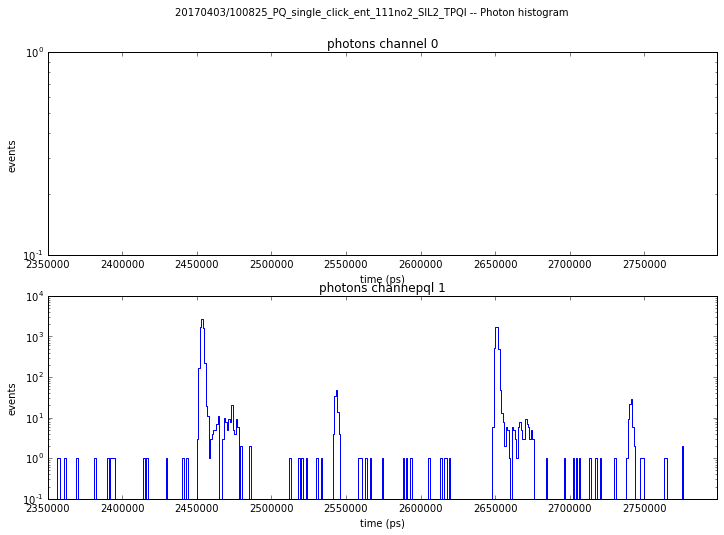

In [126]:
# pq_tools.get_photon_hist(pqf, start = 0, length = 3e6, hist_binsize = 10)

start = 2350e3
length = 450e3
hist_binsize = 1000
fig, (ax0, ax1) = pq_tools.plot_photon_hist(pqf, start = start, length = length, hist_binsize = hist_binsize, ret = 'subplots')
plt.sca(ax0)
plt.axvline(x = 3232e3,c='#2ca02c')
ax0.set_yscale('log')

198000.0


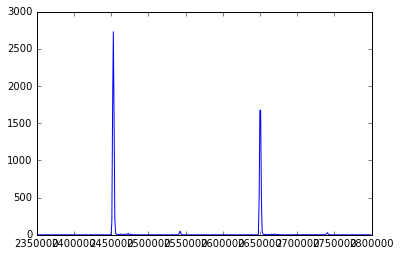

In [133]:
# fig, ax = plt.subplots(1,1, figsize=(12,8))


filepaths = tb.get_all_msmt_filepaths(folder)
pqf = h5py.File(filepaths[0],'r')
(h0, b0), (h1, b1) = pq_tools.get_photon_hist(pqf, start = start , length = length, hist_binsize = hist_binsize, ret='subplots')
h1 = np.append(h1, h1[-1])
plt.plot(b1,h1)
# print h1

a=[0,1]
j=0
n = int(length/hist_binsize)

for i in range(0,n):
    if h1[i]>1000 and h1[i]>h1[i+1] and h1[i]>h1[i-1]:
        a[j] = b1[i]
        j+=1  
print a[j-1]-a[j-2]        


# posn2 = fit_result['params_dict']['x0']

# print 'Difference in ns is ', (posn1 - posn2)/1e3

# for k in range(1,10):
#     (h0, b0), (h1, b1) = pq_tools.get_photon_hist(pqf, start = start , length = length, hist_binsize = hist_binsize, ret='subplots')
#     h1 = np.append(h1, h1[-1])
# #     plt.plot(b1,h1)
#     a=[0,1]
#     j=0
#     n = int(length/hist_binsize)
#     for i in range(0,n):
#         if h1[i]>1000 and h1[i]>h1[i+1] and h1[i]>h1[i-1]:
#             a[j] = b1[i]
#             j+=1  
#     print a[j-1]-a[j-2]  
#     start+=500e3

## Check delay time

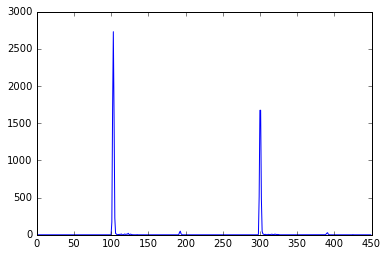

In [134]:
plt.plot(h1)

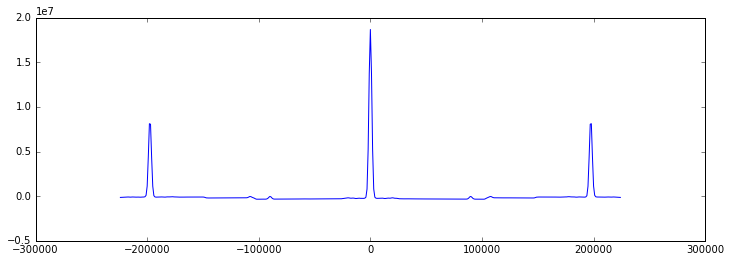

18670800.882
[  -140494.75599327   -134013.95840298   -120962.16081269   -112918.3632224
   -109892.56563211   -102293.76804183    -92244.97045154
    -93991.17286125   -105997.47103933   -110471.67344904
   -100977.87585875    -93255.17403684   -100525.37644655
   -111007.57885626   -109698.97280271   -101687.2709808    -104028.66492726
   -115335.86733697   -115407.06974668   -103130.36792476
    -98981.57033447    -95758.77274418    -69000.97515389     90209.8224364
   1125333.62002669   4364003.41761697   8114318.21520726
   8059603.01279755   4312465.81038784   1113857.22490464
     52640.68173769    -90068.30909073   -108622.76762516
   -107776.35310837   -102686.55551808    -98822.75792779    -92945.9603375
    -87501.16274721    -97343.36515692   -111373.663335     -108148.86574471
    -92001.1639228     -82615.46210088    -84889.76027897
    -83791.05845705    -74706.35663514    -60807.55904485
    -66017.76145456    -83869.96386427    -85829.16627398
    -85220.36868369    -9

In [160]:
def xcorr(a,v):
            
    xaxis = np.arange(len(a)) - len(a)/2
    return xaxis,np.correlate(np.array(a)-np.mean(a),np.array(v)-np.mean(v),'same')

(h0, b0), (h1, b1) = pq_tools.get_photon_hist(pqf,start = start, length = length, hist_binsize = hist_binsize)

xaxis,xcorr01_shifted=xcorr(h1,h1)
xaxis = (b1[1]-b1[0])*xaxis
fig, (ax0) = plt.subplots(figsize=(12,4))
plt.plot(xaxis,xcorr01_shifted)
plt.show()
plt.close('all')
xzero_ind = np.argmin(abs(xaxis))
# print xaxis
print xcorr01_shifted[xzero_ind]
print xcorr01_shifted, 'qui', xcorr01_shifted[xzero_ind:]
i = np.argmax(xcorr01_shifted[xzero_ind:])
print i
# print np.argmax(xcorr01_shifted), xcorr01_shifted[224]
# print 'Delay is ', xaxis[xzero_ind+i]


i = np.argmax(xcorr01_shifted)
# print 'Delay is ', xaxis[i]
print 'Delay is ', xaxis[xzero_ind+i]


## Add up all the files

In [ ]:
#pq_tools.get_photon_hist(pqf, start = 0, length = 3e6, hist_binsize = 10)
fps=tb.get_all_msmt_filepaths(folder = folder)

first_file = True

for fp in fps:
    pqf = pq_tools.pqf_from_fp(fp, rights = 'r+')

    start = 3200e3
    length = 50e3
    
    (h0, b0), (h1, b1) = pq_tools.get_photon_hist(pqf,start = start, length = length, hist_binsize = 200)
    if first_file:
        h0s = h0
        h1s = h1
        first_file = False
    else:
        h0s += h0
        h1s += h1

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(12,8))
# ax0.plot(b0[:-1],h0s)
# ax0.set_yscale('linear')
ax1.plot(b1[:-1],h1s)
ax1.set_yscale('log')

How many clicks are we talking about?

In [ ]:
from analysis.lib.purification import purify_pq as ppq; reload(ppq)
from analysis.lib.purification import purify_BK as pbk; reload(pbk)
from analysis.lib.m2.ssro import pqsequence as pqs; reload(pqs)
from analysis.lib.pq import pq_tools;reload(pq_tools)
%matplotlib inline
from analysis.lib.fitting import fit, common

def check_tail(st_start,st_len, start_offset_ch1):

   
    filepaths_primary = tb.get_all_msmt_filepaths(folder,pattern = 'TPQI')

    last_sync = 0
    tail_w1_1 = 0
    tail_w1_2 = 0
    
    # print filepaths
    for i,fp in enumerate(filepaths_primary):

        fp = os.path.split(fp)[0]

        a_lt4 = pqs.PQSequenceAnalysis(fp)

        ### analysis for channel 0  && window 1
        w1_ch0 = get_total_number_of_clicks_in_window(a_lt4,0,st_start,st_len)
        w1_ch1 = get_total_number_of_clicks_in_window(a_lt4,1,st_start,st_len,start_offset_ch1)
        if a_lt4.pqf['/PQ_sync_number-1'].shape != (0,):
            last_sync += a_lt4.pqf['/PQ_sync_number-1'][-1]
            tail_w1_1 += (1e4)*float(w1_ch0)

            tail_w1_2 += (1e4)*float(w1_ch1)

            
        a_lt4.finish()

    return tail_w1_1/last_sync, tail_w1_2/last_sync
            
def get_total_number_of_clicks_in_window(a,channel,st_start,st_len,offset = 0):
            
        is_ph = pq_tools.get_photons(a.pqf)[channel]
        clicks = a.pqf['/PQ_sync_time-1'].value[np.where(is_ph)] + offset
        bins = np.arange(st_start-.5,st_start+st_len,1e3)
        y,x=np.histogram(clicks, bins=bins)
        x=x[:-1]
        # print 'Total clicks:', np.sum(y)

        return np.sum(y)

start = 3220e3
length = 50e3

starts = np.linspace(start,start+20e3,20)
tails1 = []
tails2 = []
for startt in starts:
    tail1,tail2 = check_tail(startt,length,-1.6e3)
    tails1.append(tail1)
    tails2.append(tail2)
    
fig, ax = plt.subplots()
plt.plot(starts/1e3,tails1)
plt.plot(starts/1e3,tails2)
ax.set_xlabel('Window start time (ns)')
ax.set_ylabel('Tail counts (1e-4)')